# **Deep Learning Methods with Pre-Trained Word Embeddings**

### **Important Installations**

In [1]:
!pip install --upgrade gensim
!pip install xgboost
!pip install snowballstemmer
!pip install sentencepiece
!pip install pyspell

     |████████████████████████████████| 24.2MB 98.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 1.2MB 5.6MB/s 
ERROR: Could not find a version that satisfies the requirement pyspell (from versions: none)
ERROR: No matching distribution found for pyspell


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# Tokenization
!wget --quiet https://raw.githubusercontent.com/tensorflow/models/master/official/nlp/bert/tokenization.py    

### **Important imports**

In [4]:
import pandas as pd
import numpy as np
import os

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

import tokenization
from wordcloud import STOPWORDS

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from keras.layers.embeddings import Embedding
from collections import defaultdict
from collections import Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))

import re
from nltk.tokenize import word_tokenize
import gensim
import string
import tensorflow as tf
from tqdm import tqdm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout, GRU
from keras.initializers import Constant
from keras.optimizers import Adam


import logging
from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [5]:
df_main = pd.read_csv('/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/df_main.csv')
df_main['review'] = df_main['review'].values.astype('U')

##

### Create custom embedding for the data

In [6]:
# The maximum number of words to be used. (most frequent)
VOCAB_SIZE = 35000 # vocabulary_size = 35000
# Max number of words in each review
MAX_SEQUENCE_LENGTH = 64
# Fixed dimensions (standard is 100)
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df_main['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 37000 unique tokens.


### **Tokenize the Dataset**

In [7]:
# Change to sequences
#import tokenizer
X = tokenizer.texts_to_sequences(df_main['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

Y = df_main['target']
print('Shape of data tensor:', X.shape)


Shape of data tensor: (114906, 64)


### **Split the data into training/testing**

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(103415, 64) (103415,)
(11491, 64) (11491,)


## **Pooled GRU: No Embeddings**

In [9]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
np.random.seed(42)
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from keras.models import Model
from keras.layers import Input, Dense, Embedding, SpatialDropout1D, concatenate
from keras.layers import GRU, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from keras.preprocessing import text, sequence
from keras.callbacks import Callback

def get_model():
    inp = Input(shape=(MAX_SEQUENCE_LENGTH, ))
    x = Embedding(VOCAB_SIZE, EMBEDDING_DIM)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(80, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation="sigmoid")(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model




##3 **Run the model**

In [11]:
model_conv = get_model()
epochs = 20
batch_size = 64
history = model_conv.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]) 

   

Epoch 1/10
1293/1293 [==============================] - 53s 25ms/step - loss: 0.4189 - accuracy: 0.7929 - val_loss: 0.2676 - val_accuracy: 0.8910
Epoch 2/10
1293/1293 [==============================] - 32s 25ms/step - loss: 0.2029 - accuracy: 0.9205 - val_loss: 0.2368 - val_accuracy: 0.9082
Epoch 3/10
1293/1293 [==============================] - 32s 25ms/step - loss: 0.1344 - accuracy: 0.9499 - val_loss: 0.2394 - val_accuracy: 0.9147
Epoch 4/10
1293/1293 [==============================] - 32s 25ms/step - loss: 0.0944 - accuracy: 0.9648 - val_loss: 0.2384 - val_accuracy: 0.9209
Epoch 5/10
1293/1293 [==============================] - 32s 25ms/step - loss: 0.0641 - accuracy: 0.9774 - val_loss: 0.2708 - val_accuracy: 0.9245


In [12]:
accr = model_conv.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

360/360 [==============================] - 1s 4ms/step - loss: 0.2649 - accuracy: 0.9272
Test set
  Loss: 0.265
  Accuracy: 0.927


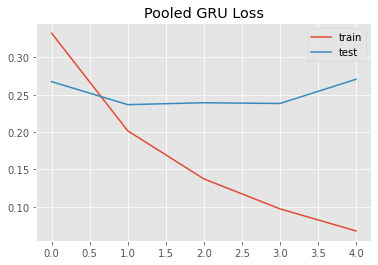

In [13]:
plt.title('Pooled GRU Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

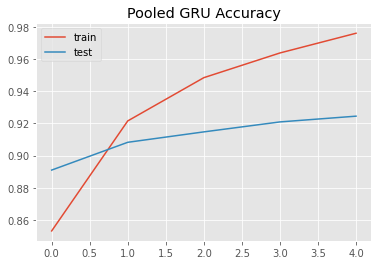

In [14]:
plt.title('Pooled GRU Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

# **Pre-trained Embeddings**

## **GloVe 6B-100d**

In [15]:
# Import GloVE. In this case, we're using 100D 
import re
from tqdm import tqdm_notebook
import pickle
from nltk.corpus import stopwords

from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

VOCAB_SIZE = 37000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 64 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 100      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/glove.6B.100d.txt"
#glove_embeddings = np.load('/content/drive/My Drive/WSU/Semester 2/IE 7860/Final Project/glove.840B.300d.pkl', allow_pickle=True)


In [16]:
# Change to sequences
#import tokenizer
X = tokenizer.texts_to_sequences(df_main['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

Y = df_main['target']
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of data tensor: (114906, 64)
(80434, 64) (80434,)
(34472, 64) (34472,)


In [17]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df_main['review'].values)
sequences = tokenizer.texts_to_sequences(df_main['review'].values)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 37000


In [18]:
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (114906, 64)
Shape of label tensor: (114906,)


In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = Y[indices]

In [20]:
embeddings_index = {}
f = open(GLOVE_DIR)
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index), EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: /content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/glove.6B.100d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


## **Pooled GRU GloVe**

In [21]:
def get_model():
    inp = Input(shape=(MAX_SEQUENCE_LENGTH, ))
    x = Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(80, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation="sigmoid")(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

model_conv = get_model()
epochs = 20
batch_size = 64
history = model_conv.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]) 

   

Epoch 1/10
1006/1006 [==============================] - 12s 9ms/step - loss: 0.5617 - accuracy: 0.6987 - val_loss: 0.3743 - val_accuracy: 0.8327
Epoch 2/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.3852 - accuracy: 0.8260 - val_loss: 0.3321 - val_accuracy: 0.8556
Epoch 3/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.3361 - accuracy: 0.8539 - val_loss: 0.3073 - val_accuracy: 0.8668
Epoch 4/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.3057 - accuracy: 0.8684 - val_loss: 0.2906 - val_accuracy: 0.8775
Epoch 5/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.2801 - accuracy: 0.8798 - val_loss: 0.2841 - val_accuracy: 0.8826
Epoch 6/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.2620 - accuracy: 0.8894 - val_loss: 0.2926 - val_accuracy: 0.8772
Epoch 7/10
1006/1006 [==============================] - 9s 9ms/step - loss: 0.2488 - accuracy: 0.8964 - val_loss: 0.2680 - val_accuracy

In [22]:
accr = model_conv.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1078/1078 [==============================] - 4s 4ms/step - loss: 0.2617 - accuracy: 0.8944
Test set
  Loss: 0.262
  Accuracy: 0.894


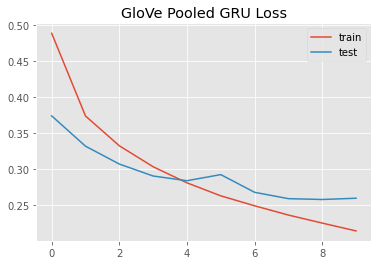

In [23]:
plt.title('GloVe Pooled GRU Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

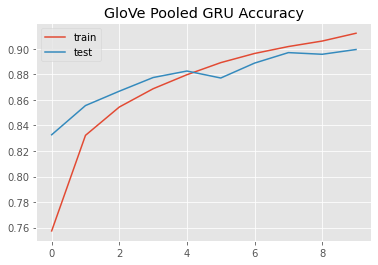

In [24]:
plt.title('GloVe Pooled GRU Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## **FastText 1M-300d**

In [25]:
# Import Fastext. In this case, we're using 100D 
import re
from tqdm import tqdm_notebook
import pickle
from nltk.corpus import stopwords

from tensorflow.keras import regularizers, initializers, optimizers, callbacks
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

MAX_NB_WORDS = 35000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 64 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 300      # embedding dimensions for word vectors (word2vec/GloVe)
FASTTEXT = "/content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/wiki-news-300d-1M.vec"
#glove_embeddings = np.load('/content/drive/My Drive/WSU/Semester 2/IE 7860/Final Project/glove.840B.300d.pkl', allow_pickle=True)



In [26]:
# Change to sequences
#import tokenizer
X = tokenizer.texts_to_sequences(df_main['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

Y = df_main['target']
print('Shape of data tensor:', X.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

Shape of data tensor: (114906, 64)
(103415, 64) (103415,)
(11491, 64) (11491,)


In [27]:
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(df_main['review'].values)
sequences = tokenizer.texts_to_sequences(df_main['review'].values)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))

Vocabulary size: 37000


In [28]:
data = pad_sequences(sequences, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', Y.shape)

Shape of data tensor: (114906, 64)
Shape of label tensor: (114906,)


In [29]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = Y[indices]

In [30]:

embeddings_index = {}
f = open(FASTTEXT)
print('Loading GloVe from:', FASTTEXT,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index), EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
print(" Completed!")

Loading GloVe from: /content/drive/MyDrive/WSU/Winter 2021/CSC 7810/Final Project/wiki-news-300d-1M.vec ...Done.
 Proceeding with Embedding Matrix... Completed!


In [32]:
def get_model():
    inp = Input(shape=(MAX_SEQUENCE_LENGTH, ))
    x = Embedding(VOCAB_SIZE, EMBEDDING_DIM, weights=[embedding_matrix], trainable=False)(inp)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(GRU(80, return_sequences=True))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(1, activation="sigmoid")(conc)
    
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

model_conv = get_model()
epochs = 20
batch_size = 64
history = model_conv.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]) 

   

Epoch 1/5
1293/1293 [==============================] - 15s 10ms/step - loss: 0.5357 - accuracy: 0.7202 - val_loss: 0.3472 - val_accuracy: 0.8466
Epoch 2/5
1293/1293 [==============================] - 12s 9ms/step - loss: 0.3507 - accuracy: 0.8452 - val_loss: 0.2990 - val_accuracy: 0.8734
Epoch 3/5
1293/1293 [==============================] - 12s 9ms/step - loss: 0.2950 - accuracy: 0.8728 - val_loss: 0.2702 - val_accuracy: 0.8884
Epoch 4/5
1293/1293 [==============================] - 12s 9ms/step - loss: 0.2589 - accuracy: 0.8894 - val_loss: 0.2571 - val_accuracy: 0.8949
Epoch 5/5
1293/1293 [==============================] - 12s 9ms/step - loss: 0.2420 - accuracy: 0.8993 - val_loss: 0.2487 - val_accuracy: 0.8986


In [33]:
accr = model_conv.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

360/360 [==============================] - 1s 4ms/step - loss: 0.2523 - accuracy: 0.8959
Test set
  Loss: 0.252
  Accuracy: 0.896


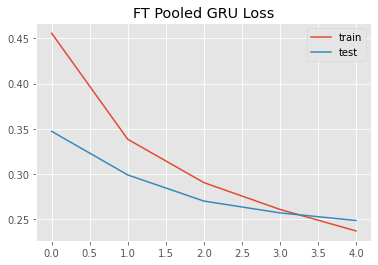

In [34]:
plt.title('FT Pooled GRU Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

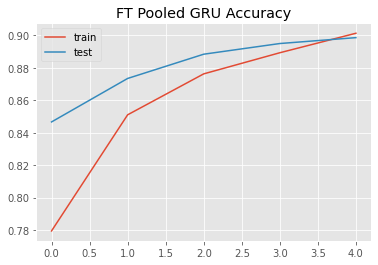

In [35]:
plt.title('FT Pooled GRU Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();